Импорт библиотек

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import rcParams
from math import sqrt

rcParams['animation.embed_limit'] = 2**128
rc('animation', html='jshtml')

Константы

In [ ]:
step = 40000
t = np.linspace(0, 5000, step)
G = 9.8
threshold = 0.2

Ввод параметров (хочет ли пользователь это вводить?)

In [ ]:
m1 = 10 # масса первого тела
m2 = 5  # масса второго тела
m3 = 5  # масса третьего тела

initial_position_1 = np.array([10.0, -4.0, 4.0]) # начальная позиция первого тела
initial_position_2 = np.array([0.0, -3.0, 5.5])   # начальная позиция второго тела
initial_position_3 = np.array([3, 5.0, 2.5])      # начальная позиция третьего тела

initial_velocity_1 = np.array([0.3, 0, 0])        # начальная скорость первого тела
initial_velocity_2 = np.array([0, 0.2, 0])        # начальная скорость второго тела
initial_velocity_3 = np.array([0, 0, -0.1])       # начальная скорость третьего тела

Приведение параметров в вид удобный для рассчётов

In [ ]:
velocity_array_1 = [initial_velocity_1]
velocity_array_2 = [initial_velocity_2]
velocity_array_3 = [initial_velocity_3]

position_array_1 = [initial_position_1]
position_array_2 = [initial_position_2]
position_array_3 = [initial_position_3]

В рамках классической теории сила притяжения двух тел определяется законом Ньютона:

## $ \vec{F}(\vec{r}_1, \vec{r}_2)=-G m_1 m_2 \frac{\vec{r}_1 - \vec{r}_2}{|\vec{r}_1 - \vec{r}_2|^3} $

где $\vec{r}_1, \vec{r}_2$ — положение тел в пространстве, $m_1, m_2$ — массы тел, $G$ — гравитационная постоянная.
В системе из $N$ тел на каждое из них будет действовать сила притяжения от остальных, что выражается уравнением:

## $ \vec{F}_n=-G \sum_{k \neq n} m_n m_k \frac{\vec{r}_n - \vec{r}_k}{|\vec{r}_n - \vec{r}_k|^3} $

Воспользовавшись вторым законом Ньютона запишем ускорение для каждой частицы:

## $ \vec{a}_n = \vec{F}_n/m_n = -G \sum_{k \neq n} m_k \frac{\vec{r}_n - \vec{r}_k}{|\vec{r}_n - \vec{r}_k|^3}. $



Вспоминая, что ускорение — это вторая производная координаты по времени, получим дифференциальное уравнение второго порядка в частных производных, которое необходимо решить для получения траектории каждого тела:

## $ \frac{\partial^2 \vec{r}_n }{\partial t^2} = f_n =-G \sum_{k \neq n} m_k \frac{\vec{r}_n - \vec{r}_k}{|\vec{r}_n - \vec{r}_k|^3}. $

К сожалению тут сложность $O(N^2)$ , так что при увеличении количества тел возникнут большие проблемы. (Идея доп. баллов написать очень хорошие вычисления на видеокарте с визуализацией)

Рассчёт каждого шага

In [ ]:
for i in range(step):

    r_1_2_diff = position_array_1[i] - position_array_2[i]
    r_1_2 = pow(sqrt(pow(r_1_2_diff[0], 2) + pow(r_1_2_diff[1], 2) + pow(r_1_2_diff[2], 2)), 3)

    r_1_3_diff = position_array_1[i] - position_array_3[i]
    r_1_3 = pow(sqrt(pow(r_1_3_diff[0], 2) + pow(r_1_3_diff[1], 2) + pow(r_1_3_diff[2], 2)), 3)

    a1 = (-G * m2) * (position_array_1[i] - position_array_2[i]) / r_1_2 - (G * m3) * (position_array_1[i] - position_array_3[i]) / r_1_3
    
    if r_1_2 <= threshold or r_1_3 <= threshold:
        a1 = 0

    r_2_1_diff = position_array_2[i] - position_array_1[i]
    r_2_1 = pow(sqrt(pow(r_2_1_diff[0], 2) + pow(r_2_1_diff[1], 2) + pow(r_2_1_diff[2], 2)), 3)

    r_2_3_diff = position_array_2[i] - position_array_3[i]
    r_2_3 = pow(sqrt(pow(r_2_3_diff[0], 2) + pow(r_2_3_diff[1], 2) + pow(r_2_3_diff[2], 2)), 3)

    a2 = (-G * m1) * (position_array_2[i] - position_array_1[i]) / r_2_1 - (G * m3) * (position_array_2[i] - position_array_3[i]) / r_2_3
    
    if r_2_1 <= threshold or r_2_3 <= threshold:
        a2 = 0

    r_3_1_diff = position_array_3[i] - position_array_1[i]
    r_3_1 = pow(sqrt(pow(r_3_1_diff[0], 2) + pow(r_3_1_diff[1], 2) + pow(r_3_1_diff[2], 2)), 3)

    r_3_2_diff = position_array_3[i] - position_array_2[i]
    r_3_2 = pow(sqrt(pow(r_3_2_diff[0], 2) + pow(r_3_2_diff[1], 2) + pow(r_3_2_diff[2], 2)), 3)

    a3 = (-G * m3) * (position_array_3[i] - position_array_1[i]) / r_3_1 - (G * m2) * (position_array_3[i] - position_array_2[i]) / r_3_2

    if r_3_1 <= threshold or r_3_2 <= threshold:
        a3 = 0

    time = 1.0 / 500

    v1_new = velocity_array_1[i] + a1 * time
    v2_new = velocity_array_2[i] + a2 * time
    v3_new = velocity_array_3[i] + a3 * time

    velocity_array_1.append(v1_new)
    velocity_array_2.append(v2_new)
    velocity_array_3.append(v3_new)

    x1_new = (position_array_1[i] + velocity_array_1[i] * time + 1.0 / 2 * a1 * time * time)
    x2_new = (position_array_2[i] + velocity_array_2[i] * time + 1.0 / 2 * a2 * time * time)
    x3_new = (position_array_3[i] + velocity_array_3[i] * time + 1.0 / 2 * a3 * time * time)

    position_array_1.append(x1_new)
    position_array_2.append(x2_new)
    position_array_3.append(x3_new)

positions = np.asarray([position_array_1, position_array_2, position_array_3])

Настройка фигуры и 3D-оси для анимации



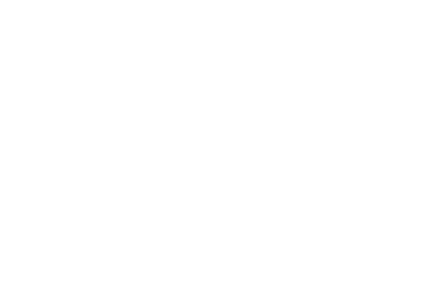

In [ ]:
fig = plt.figure();
ax = fig.add_axes([0, 0, 1, 1], projection="3d");
ax.axis("off");

Выбор цвета для каждой траектории

In [ ]:
colors = plt.cm.jet(np.linspace(0, 1, 3));

Линий и точки

In [ ]:
lines = sum([ax.plot([], [], [], "-", c=c) for c in colors], [])
pts = sum([ax.plot([], [], [], "o", c=c) for c in colors], [])

Границы осей

In [ ]:
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))
ax.set_zlim((-15, 15));

Заданная точка обзора: задается (градусы широты, градусы азимута)

In [ ]:
ax.view_init(30, 0)

Создание анимации

In [ ]:
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts


def animate(i):

    i = (i * 25) % step

    for line, pt, xi in zip(lines, pts, positions):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    fig.canvas.draw()
    return lines + pts


anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=1000, interval=30, blit=False
)

Создание видео

In [ ]:
anim

Output hidden; open in https://colab.research.google.com to view.